# Problem Statement

Big Mart Outlet Sales Prediction: BigMart data scientists gathered 2013 sales data for 1559 goods across 10 locations in various cities. Some characteristics of each product and shop have also been determined. The goal is to create a predictive model that predicts the sales of each product at each store.

With this approach, BigMart will aim to identify the qualities of items and outlets that are important in growing sales.

Please keep in mind that certain retailers may not provide all of the data owing to technological issues. As a result, they must be treated as such.

# Hypothesis Generation

1.Product sales may be affected by item weight.
2.The product's sales may be affected by its fat content.
3.More Item Visibility of a specific product may be more expensive than other items.
4.The item kind may have an impact on sales.
5.Items with a higher MRP have higher item outlet sales.
6.Are the stores that have been around for a while more successful?
7.The size of the stores may have an impact on the item sales at a certain store.
8.The location of the stores may be determined by the item outlet sales.
9.Are supermarkets more profitable than others?

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Loading the dataset

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Statistical information
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatypes of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the dataset

In [6]:
# Check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col       

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [10]:
# Fill the missing values
item_weight_mean = df.pivot_table(values="Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [12]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])
        

In [13]:
df['Item_Weight'].isnull().sum()

0

In [14]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [16]:
df['Outlet_Size'].isnull().sum()

0

In [17]:
sum(df['Item_Visibility']==0)

526

In [18]:
# replace zeros with mean 
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [19]:
sum(df['Item_Visibility']==0)

0

In [20]:
# Combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Creation of New Attributes

In [21]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [22]:
df['New_Item_Type'] = df['New_Item_Type'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [23]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [24]:
# Create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [25]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# EDA (Exploratory Data Analysis)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

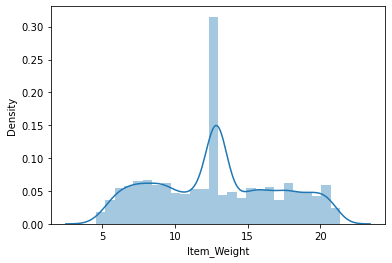

In [27]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

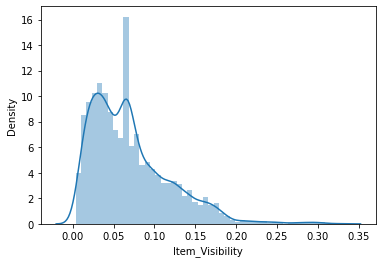

In [28]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

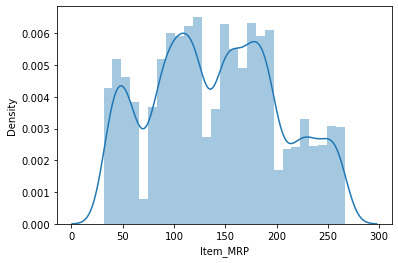

In [29]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

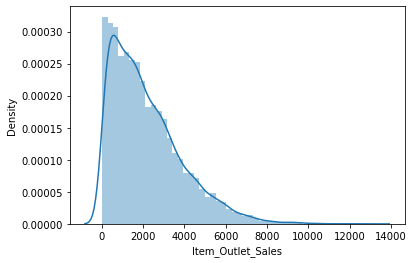

In [30]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

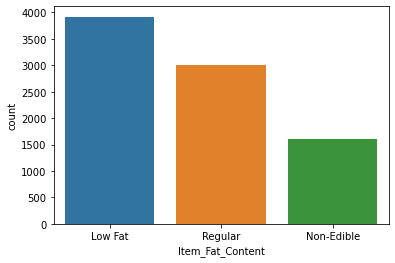

In [31]:
sns.countplot(df['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

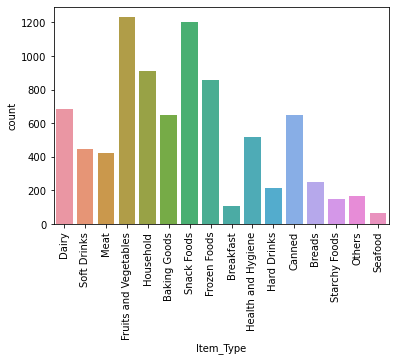

In [32]:
#plt.figure(figsize=(25,8))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

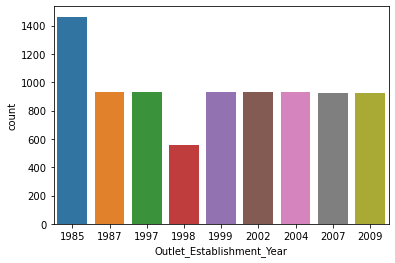

In [33]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

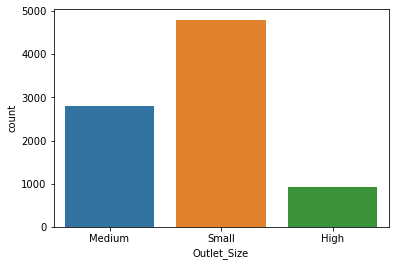

In [34]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

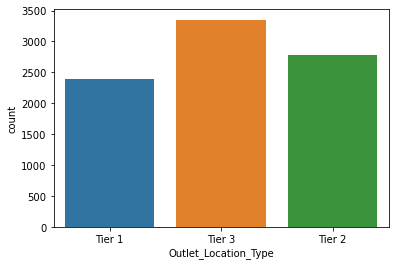

In [35]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

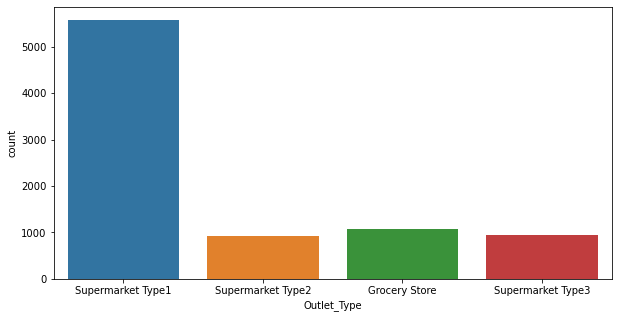

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Type'])

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

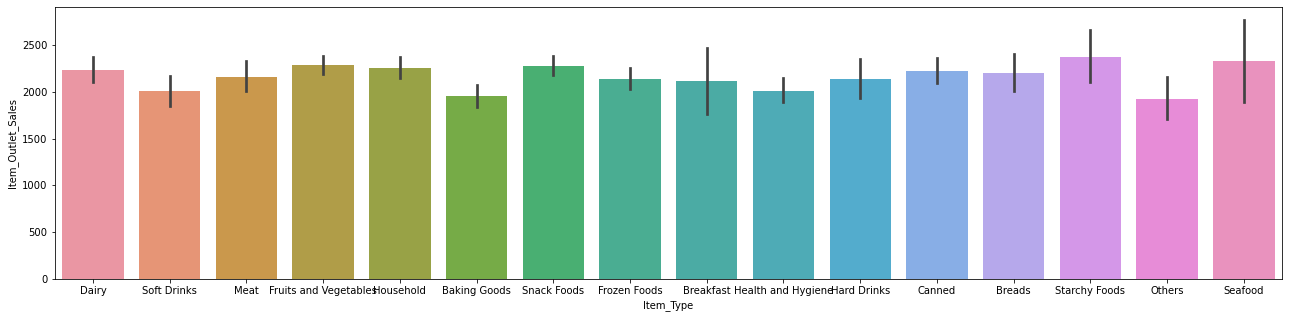

In [37]:
plt.figure(figsize=(22,5))
sns.barplot(data=df, x = "Item_Type", y="Item_Outlet_Sales")


# Correlation Matrix

<AxesSubplot:>

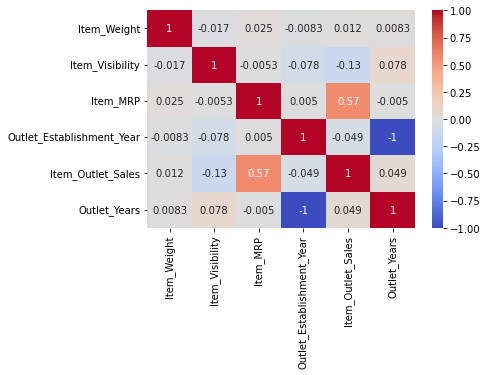

In [38]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding 

In [40]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,994.7052,26,1,...,0,0,1,0,1,0,0,0,0,1


# Train test split

In [41]:
X = df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])
Y = df['Item_Outlet_Sales']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# Model Building

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [44]:
lr.fit(X_train,Y_train)

LinearRegression()

In [45]:
#Evaluation

In [46]:
training_data_prediction = lr.predict(X_train)

In [47]:
# R squared Value
r2_train =r2_score(Y_train, training_data_prediction)

In [48]:
print('R Squared value = ', r2_train)

R Squared value =  0.5643143913309248


In [49]:
testing_data_prediction = lr.predict(X_test)

In [50]:
r2_train = r2_score(Y_test, testing_data_prediction)

In [51]:
print('R Squared value = ', r2_train)

R Squared value =  0.5579824841607984


In [52]:
RMSE = np.sqrt(mean_squared_error(Y_test, testing_data_prediction))

In [53]:
RMSE

1097.5695659027665

# LightGBM

In [54]:
from lightgbm import LGBMRegressor

In [55]:
from bayes_opt import BayesianOptimization

In [56]:
model = LGBMRegressor(random_state=121, class_weight='balanced')

In [57]:
from sklearn.model_selection import cross_val_score

def lgb_cv(n_estimators, max_depth, num_leaves,subsample,colsample_bytree, data, targets):
    estimator = LGBMRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        num_leaves=num_leaves,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=121,
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='neg_root_mean_squared_error', cv=5)
    return cval.mean()

def lgb_crossval(n_estimators, max_depth, num_leaves,subsample,colsample_bytree):
        return lgb_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            num_leaves=int(num_leaves),
            subsample=max(min(subsample, 0.999), 1e-3),
            colsample_bytree=max(min(colsample_bytree, 0.999), 1e-3),                            
            data=X_train,
            targets=Y_train,
        )
        

In [58]:
optimizer = BayesianOptimization(
        f=lgb_crossval,
        pbounds={
            "n_estimators": (10, 300),
            "max_depth": (5, 20),
            "num_leaves": (21, 51),
            "subsample": (0.1, 0.999),
            "colsample_bytree": (0.1, 0.999)
        },
        random_state=121,
        verbose=2
    )
optimizer.maximize(n_iter=20)


|   iter    |  target   | colsam... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------
| 1         | -1.174e+0 | 0.2001    | 8.162     | 77.56     | 25.56     | 0.8463    |
| 2         | -1.142e+0 | 0.4667    | 13.34     | 226.2     | 28.45     | 0.9708    |
| 3         | -1.131e+0 | 0.9565    | 12.35     | 15.31     | 46.73     | 0.464     |
| 4         | -1.162e+0 | 0.6596    | 9.431     | 279.6     | 33.17     | 0.61      |
| 5         | -1.187e+0 | 0.3209    | 8.386     | 21.1      | 38.43     | 0.8455    |
| 6         | -1.147e+0 | 0.8861    | 11.52     | 128.0     | 48.73     | 0.6886    |
| 7         | -1.123e+0 | 0.5271    | 6.506     | 179.8     | 30.86     | 0.2325    |
| 8         | -1.27e+03 | 0.2772    | 6.574     | 18.73     | 48.07     | 0.9759    |
| 9         | -1.166e+0 | 0.3914    | 13.99     | 280.3     | 45.51     | 0.9908    |
| 10        | -1.104e+0 | 0.5094    | 5.74      | 100.

In [59]:
optimizer.max

{'target': -1103.661936212742,
 'params': {'colsample_bytree': 0.5094216789256009,
  'max_depth': 5.740233848044245,
  'n_estimators': 100.87293292026305,
  'num_leaves': 40.21328145083834,
  'subsample': 0.17560289138507484}}

In [60]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['subsample'] = best_params['subsample']
best_params['num_leaves'] = int(best_params['num_leaves'])
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['colsample_bytree'] = best_params['colsample_bytree']


In [61]:
best_model = LGBMRegressor(random_state=121)
best_model.set_params(**best_params)
best_model.fit(X_train, Y_train)

LGBMRegressor(colsample_bytree=0.5094216789256009, max_depth=5, num_leaves=40,
              random_state=121, subsample=0.17560289138507484)

In [62]:
testing_data_prediction = best_model.predict(X_test)

In [63]:
X_test.isnull().sum()

Item_Weight               0
Item_Visibility           0
Item_Type                 0
Item_MRP                  0
Outlet_Years              0
Outlet                    0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Item_Fat_Content_2        0
Outlet_Size_0             0
Outlet_Size_1             0
Outlet_Size_2             0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
New_Item_Type_0           0
New_Item_Type_1           0
New_Item_Type_2           0
dtype: int64

In [64]:
r2_train = r2_score(Y_test, testing_data_prediction)

In [65]:
print('R Squared value = ', r2_train)

R Squared value =  0.5927658697737316


In [66]:
RMSE = np.sqrt(mean_squared_error(Y_test, testing_data_prediction))

In [67]:
RMSE

1053.4996627048656

# Random Forest Regressor

In [68]:
Model = RandomForestRegressor(random_state = 121)

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 11, 13, 17],
    'max_features': [10],
    'min_samples_leaf': [5, 10, 20, 50] 
}

In [71]:
tunned_model = GridSearchCV(
estimator=Model, param_grid=param_grid, scoring='f1', n_jobs=-1,
cv=5, refit=True, return_train_score=True)

In [72]:
model = tunned_model.fit(X_train,Y_train)

In [73]:
testing_data_prediction = model.predict(X_test)

In [74]:
r2_train = r2_score(Y_test, testing_data_prediction)

In [75]:
print('R Squared value = ', r2_train)

R Squared value =  0.5877500748211498


In [76]:
RMSE = np.sqrt(mean_squared_error(Y_test, testing_data_prediction))

In [77]:
RMSE

1059.9676457442345

# XGBoost Regressor

In [78]:
from xgboost import XGBRegressor

In [79]:
xgb_model = XGBRegressor(random_state=121)

In [80]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 11, 13, 17],
    'max_leaves': [10],
    'num_parallel_tree': [5] 
}

In [81]:
tunned_model = GridSearchCV(
estimator=xgb_model, param_grid=param_grid, scoring='f1', n_jobs=-1,
cv=5, refit=True, return_train_score=True)

In [82]:
model = tunned_model.fit(X_train,Y_train)

In [83]:
testing_data_prediction = model.predict(X_test)

In [84]:
r2_train = r2_score(Y_test, testing_data_prediction)

In [85]:
print('R Squared value = ', r2_train)

R Squared value =  0.5688490699277668


# Prediction on Testing Dataset

In [86]:
df1 = pd.read_csv('test_data.csv')

In [87]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [88]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [89]:
df1['Item_Weight'].fillna(df1.Item_Weight.mean(), inplace = True)
df1['Outlet_Size'].fillna(df1.Outlet_Size.mode()[0], inplace = True)

In [90]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [92]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'})
df1['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [93]:
df1['New_Item_Type'] = df1['Item_Identifier'].apply(lambda x: x[:2])
df1['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [94]:
df1['New_Item_Type'] = df1['New_Item_Type'].replace({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df1['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [95]:
df1.loc[df1['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df1['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [96]:
df1['Outlet_Years'] = 2013 - df1['Outlet_Establishment_Year']

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Outlet'] = le.fit_transform(df1['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df1[col] = le.fit_transform(df1[col])

In [98]:
df2 = pd.get_dummies(df1, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,14,9,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,6,2,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,15,0,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,6,2,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,4,234.2300,OUT027,1985,28,5,0,...,0,0,1,0,0,0,1,0,1,0


In [99]:
df3 = df2.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])

In [100]:
test_pred = best_model.predict(df3)

In [101]:
test_pred

array([1502.70741356, 1479.69817939,  941.70020054, ..., 1907.32165308,
       3657.41659574, 1345.03813057])

In [102]:
df1["Item_Outlet_Sale"] = test_pred

In [103]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet,Item_Outlet_Sale
0,FDW58,20.750000,0,0.007565,13,107.8622,OUT049,1999,1,0,1,1,14,9,1502.707414
1,FDW14,8.300000,2,0.038428,4,87.3198,OUT017,2007,1,1,1,1,6,2,1479.698179
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,1998,1,2,0,2,15,0,941.700201
3,FDQ58,7.315000,0,0.015388,13,155.0340,OUT017,2007,1,1,1,1,6,2,2643.481027
4,FDY38,12.695633,2,0.118599,4,234.2300,OUT027,1985,1,2,3,1,28,5,6170.683465


# Conclusion

1.Low Fat Content items sell better in both Tier 1 and Tier 3 cities, suggesting that diet awareness is not confined to urban areas.

2.Products with enhanced visibility do not have higher sales or lower MRPs; rather, visibility is evenly distributed.

3.The most popular goods in each store, regardless of location, are snack foods and fruits and vegetables.

4.In terms of sales, the older Medium-sized establishments beat the others.

5.While Supermarket Type-1 has a larger size, which correlates to more sales, this does not mean that high-performing grocery stores are inferior to it, as they also do well with smaller sizes.

6.The top performing supermarket type is Type-3, followed by rural grocery businesses.